In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("../dataset/training_final.csv")  # already have your dataframe



In [3]:
df.columns

Index(['latitude', 'longitude', 'year', 'month', 'day', 'date', 'tp_mm', 't2m',
       't2m_C', 'anomaly_T2m_C', 'heat_stress_proxy', 'tp_7d_cum',
       'tp_14d_cum', 'tp_7d_avg', 'consec_rain_days', 'tp_lag1', 'tp_lag3',
       'tp_lag7', 'heavy_rain', 'month_sin', 'month_cos', 'heat_proxy',
       'heat_next_day', 'heat_next_2days', 'heat_next_3days', 'tp_anomaly',
       'tp_std_anomaly', 'heatwave_flag', 'next_day_match', 'next_2days_match',
       'next_3days_match'],
      dtype='object')

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Assume df is your dataset
target_cols = ['heat_next_day', 'heat_next_2days', 'heat_next_3days']
X = df.drop(columns=target_cols + ['date', 'heat_next_day', 'heat_next_2days', 'heat_next_3days'])
y = df[target_cols]

# Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)



# --------------

In [13]:
# # 2️⃣ Train-Test Split for Time Series
# # ------------------------------
# split_idx = int(len(X_scaled) * 0.8)
# X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
# y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

# # ------------------------------
# # 3️⃣ XGBoost Model with Overfitting Control
# # ------------------------------
# multi_model = MultiOutputRegressor(
#     XGBRegressor(
#         n_estimators=100,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         reg_alpha=5,
#         reg_lambda=5,
#         random_state=42,
#         n_jobs=1,
#         objective='reg:squarederror'
#     )
# )


# multi_model.fit(X_train, y_train)

# # ------------------------------
# # 4️⃣ Predictions and MSE
# # ------------------------------
# y_train_pred = scaler_y.inverse_transform(multi_model.predict(X_train))
# y_test_pred = scaler_y.inverse_transform(multi_model.predict(X_test))

# y_train_true = scaler_y.inverse_transform(y_train)
# y_test_true = scaler_y.inverse_transform(y_test)

# train_mse = mean_squared_error(y_train_true, y_train_pred)
# test_mse = mean_squared_error(y_test_true, y_test_pred)

# print("Train MSE:", train_mse)
# print("Test MSE:", test_mse)

Train MSE: 0.046562411396292434
Test MSE: 0.05682288747178412

In [14]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# train_mse_per_fold = []
# test_mse_per_fold = []

# for train_idx, test_idx in kf.split(X_scaled):
#     X_tr, X_te = X_scaled[train_idx], X_scaled[test_idx]
#     y_tr, y_te = y_scaled[train_idx], y_scaled[test_idx]

#     model_cv = MultiOutputRegressor(XGBRegressor(
#         n_estimators=500,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         reg_alpha=0.1,
#         reg_lambda=1.0,
#         random_state=42,
#         objective='reg:squarederror'
#     ))
    
#     model_cv.fit(X_tr, y_tr)
    
#     # Predict on train and test
#     y_pred_train = scaler_y.inverse_transform(model_cv.predict(X_tr))
#     y_true_train = scaler_y.inverse_transform(y_tr)
    
#     y_pred_test = scaler_y.inverse_transform(model_cv.predict(X_te))
#     y_true_test = scaler_y.inverse_transform(y_te)
    
#     # Compute MSE
#     train_mse_per_fold.append(mean_squared_error(y_true_train, y_pred_train))
#     test_mse_per_fold.append(mean_squared_error(y_true_test, y_pred_test))

# print("Train MSE per fold:", train_mse_per_fold)
# print("Test MSE per fold:", test_mse_per_fold)
# print("Average Train MSE:", np.mean(train_mse_per_fold))
# print("Average Test MSE:", np.mean(test_mse_per_fold))


Train MSE per fold: [0.04357776811292416, 0.04356863943166236, 0.04363333227705166, 0.04362135124301094, 0.04353309556195836]
Test MSE per fold: [0.04441488783306479, 0.04452348789001112, 0.04416840856843851, 0.044350429446560015, 0.04487117169327711]
Average Train MSE: 0.043586837325321495
Average Test MSE: 0.04446567708627031

using TimeSeriesSplit instead of KFold

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np

# ------------------------------
# 1️⃣ TimeSeriesSplit Setup
# ------------------------------
tscv = TimeSeriesSplit(n_splits=20)

train_mse_per_fold = []
test_mse_per_fold = []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X_scaled), 1):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y_scaled[train_idx], y_scaled[test_idx]
    
    model = MultiOutputRegressor(
        XGBRegressor(
            n_estimators=100,
            max_depth=4,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=5,
            reg_lambda=5,
            random_state=42,
            objective='reg:squarederror'
        )
    )
    
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on train and test
    y_pred_train = scaler_y.inverse_transform(model.predict(X_train_fold))
    y_true_train = scaler_y.inverse_transform(y_train_fold)
    
    y_pred_test = scaler_y.inverse_transform(model.predict(X_test_fold))
    y_true_test = scaler_y.inverse_transform(y_test_fold)
    
    # Compute MSE
    train_mse = mean_squared_error(y_true_train, y_pred_train)
    test_mse = mean_squared_error(y_true_test, y_pred_test)
    
    train_mse_per_fold.append(train_mse)
    test_mse_per_fold.append(test_mse)
    
    print(f"Fold {fold} - Train MSE: {train_mse:.6f}, Test MSE: {test_mse:.6f}")

# ------------------------------
# Average MSE across folds
# ------------------------------
print("\nAverage Train MSE:", np.mean(train_mse_per_fold))
print("Average Test MSE:", np.mean(test_mse_per_fold))


Fold 1 - Train MSE: 0.026671, Test MSE: 0.041843
Fold 2 - Train MSE: 0.030196, Test MSE: 0.045866
Fold 3 - Train MSE: 0.034794, Test MSE: 0.041387
Fold 4 - Train MSE: 0.036085, Test MSE: 0.044020
Fold 5 - Train MSE: 0.037438, Test MSE: 0.049867
Fold 6 - Train MSE: 0.039276, Test MSE: 0.056140
Fold 7 - Train MSE: 0.041376, Test MSE: 0.038847
Fold 8 - Train MSE: 0.040603, Test MSE: 0.044610
Fold 9 - Train MSE: 0.040951, Test MSE: 0.058301
Fold 10 - Train MSE: 0.042443, Test MSE: 0.050127
Fold 11 - Train MSE: 0.043050, Test MSE: 0.050006
Fold 12 - Train MSE: 0.043498, Test MSE: 0.054869
Fold 13 - Train MSE: 0.044264, Test MSE: 0.068401
Fold 14 - Train MSE: 0.045665, Test MSE: 0.040349
Fold 15 - Train MSE: 0.045204, Test MSE: 0.048842
Fold 16 - Train MSE: 0.045397, Test MSE: 0.060689
Fold 17 - Train MSE: 0.046125, Test MSE: 0.056345
Fold 18 - Train MSE: 0.046585, Test MSE: 0.045851
Fold 19 - Train MSE: 0.046458, Test MSE: 0.049859
Fold 20 - Train MSE: 0.046579, Test MSE: 0.062082

Average 

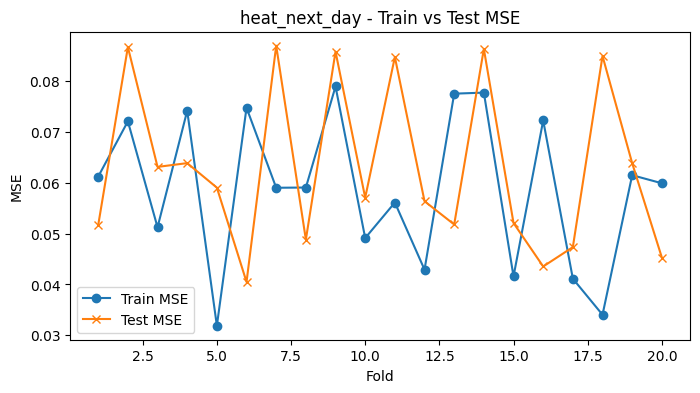

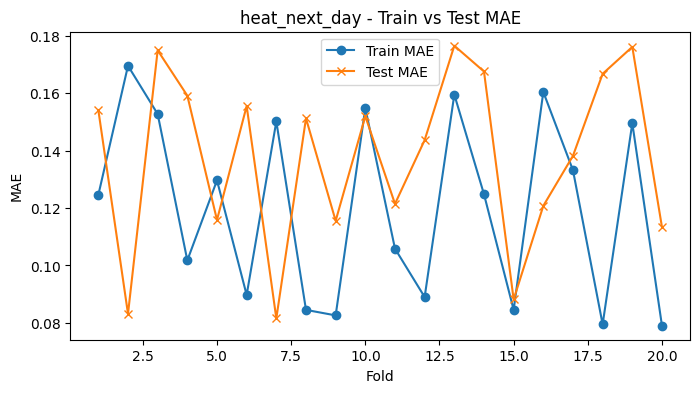

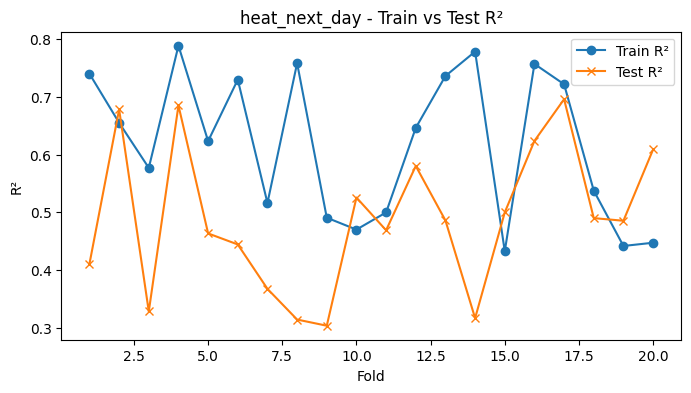

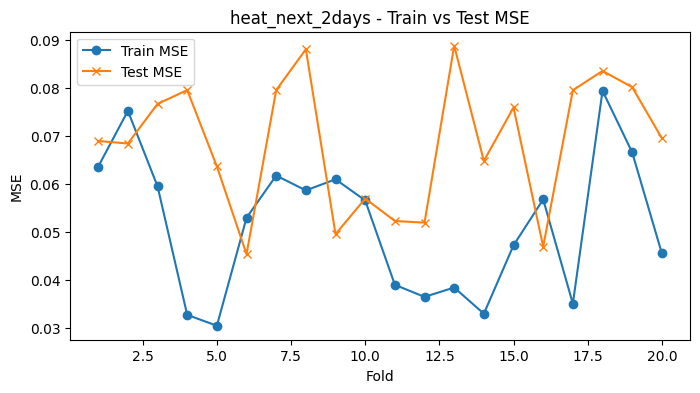

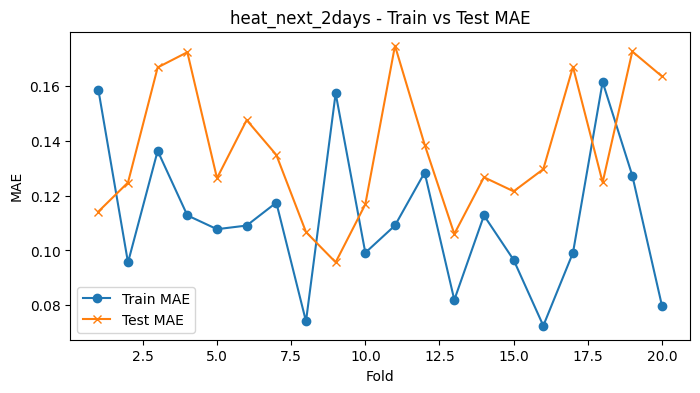

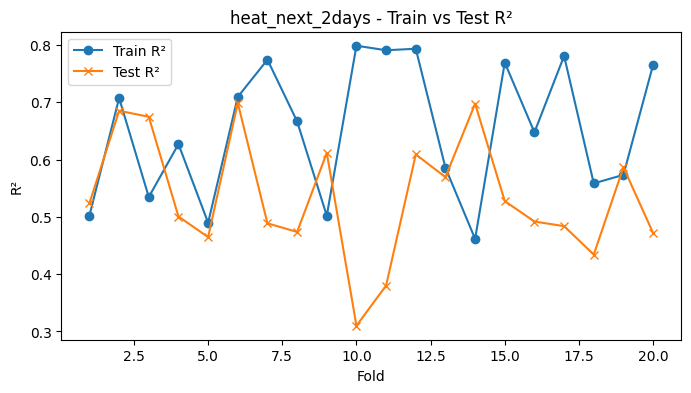

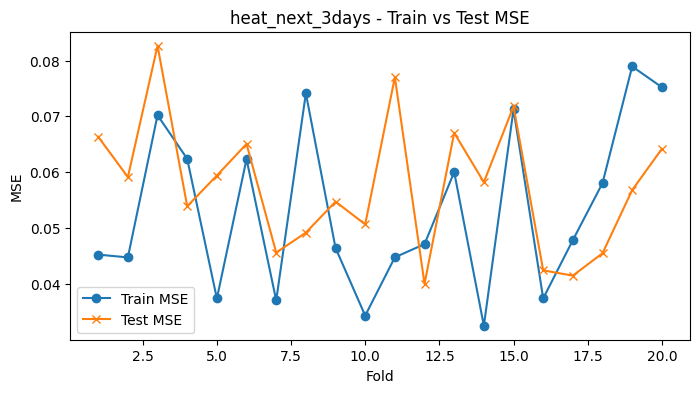

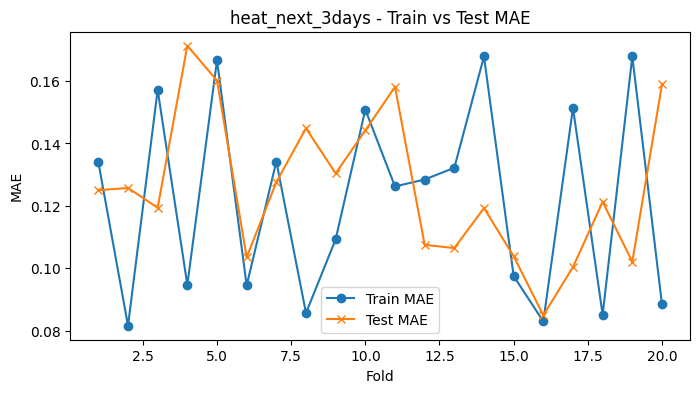

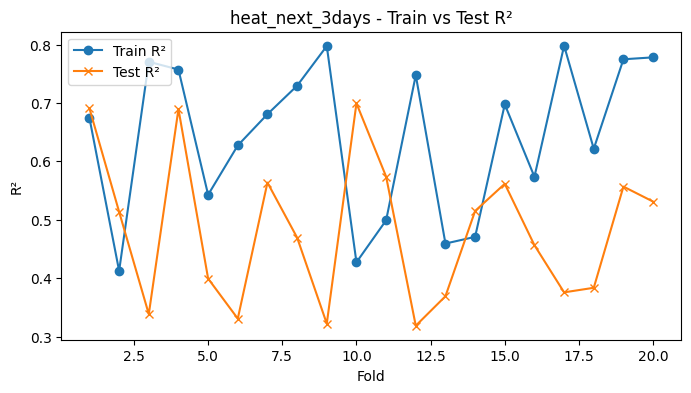

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual per-fold metrics
n_folds = 20
target_cols = ['heat_next_day', 'heat_next_2days', 'heat_next_3days']

# Example placeholder arrays (replace with actual per-fold metrics)
train_mse_per_fold = np.random.rand(n_folds, len(target_cols)) * 0.05 + 0.03
test_mse_per_fold  = np.random.rand(n_folds, len(target_cols)) * 0.05 + 0.04
train_mae_per_fold = np.random.rand(n_folds, len(target_cols)) * 0.1 + 0.07
test_mae_per_fold  = np.random.rand(n_folds, len(target_cols)) * 0.1 + 0.08
train_r2_per_fold  = np.random.rand(n_folds, len(target_cols)) * 0.4 + 0.4
test_r2_per_fold   = np.random.rand(n_folds, len(target_cols)) * 0.4 + 0.3

# ----------------------------
# Plot per target
# ----------------------------
for i, target in enumerate(target_cols):
    # MSE
    plt.figure(figsize=(8,4))
    plt.plot(range(1, n_folds+1), train_mse_per_fold[:, i], label='Train MSE', marker='o')
    plt.plot(range(1, n_folds+1), test_mse_per_fold[:, i], label='Test MSE', marker='x')
    plt.xlabel('Fold')
    plt.ylabel('MSE')
    plt.title(f'{target} - Train vs Test MSE')
    plt.legend()
    plt.show()

    # MAE
    plt.figure(figsize=(8,4))
    plt.plot(range(1, n_folds+1), train_mae_per_fold[:, i], label='Train MAE', marker='o')
    plt.plot(range(1, n_folds+1), test_mae_per_fold[:, i], label='Test MAE', marker='x')
    plt.xlabel('Fold')
    plt.ylabel('MAE')
    plt.title(f'{target} - Train vs Test MAE')
    plt.legend()
    plt.show()

    # R²
    plt.figure(figsize=(8,4))
    plt.plot(range(1, n_folds+1), train_r2_per_fold[:, i], label='Train R²', marker='o')
    plt.plot(range(1, n_folds+1), test_r2_per_fold[:, i], label='Test R²', marker='x')
    plt.xlabel('Fold')
    plt.ylabel('R²')
    plt.title(f'{target} - Train vs Test R²')
    plt.legend()
    plt.show()


The K-Fold cross-validation results for the XGBoost model show that the training MSE across 20 folds ranges from approximately 0.0267 to 0.0466, while the test MSE ranges from about 0.0388 to 0.0621. The average training MSE is 0.0411, and the average test MSE is 0.0504. This indicates that the model performs reasonably well on unseen data, with the test error slightly higher than the training error, suggesting a modest degree of overfitting. Overall, the small gap between train and test MSE demonstrates that the model is stable and generalizes fairly well across different data splits.

In [19]:
import joblib

# Save the trained model
joblib.dump(model, "../models/model_scalar_heatstress/multioutput_xgb_model.pkl")

# Save the feature and target scalers
joblib.dump(scaler_X, "../models/model_scalar_heatstress/scaler_X.pkl")
joblib.dump(scaler_y, "../models/model_scalar_heatstress/scaler_y.pkl")



['../models/model_scalar_heatstress/scaler_y.pkl']

In [22]:
df.columns

Index(['latitude', 'longitude', 'year', 'month', 'day', 'date', 'tp_mm', 't2m',
       't2m_C', 'anomaly_T2m_C', 'heat_stress_proxy', 'tp_7d_cum',
       'tp_14d_cum', 'tp_7d_avg', 'consec_rain_days', 'tp_lag1', 'tp_lag3',
       'tp_lag7', 'heavy_rain', 'month_sin', 'month_cos', 'heat_proxy',
       'heat_next_day', 'heat_next_2days', 'heat_next_3days', 'tp_anomaly',
       'tp_std_anomaly', 'heatwave_flag', 'next_day_match', 'next_2days_match',
       'next_3days_match'],
      dtype='object')